In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import minmax_scale

#Data=pd.read_csv('/Users/juyoung/Desktop/빅데이터프로그래밍/프로젝트/data/depression.csv',encoding='utf-8')
Data=pd.read_csv('/Users/Juyoung/Desktop/BigdataProgramming-main/프로젝트/data/depression.csv',encoding='utf-8')
Data=Data[Data['Code']=='v']
Data=Data.dropna(axis=0)
Data=Data.reset_index()
Data


,index,Entity,Code,Year,depression_percent,suicide,Unnamed: 5,Real_house_price,Percentage_change_PIR,Safety,Working_age_popul,Elderly_popul,Working_hours,Unemploy_rate,Employ_rate,Gini_coff
0,0,Australia,v,2017,4.623881,13.1,1310000,102.2,8.3,63.0,65.5,15.7,1712.0,6.498750,74.275,0.325
1,1,Austria,v,2017,3.260970,15.4,1540000,117.9,5.3,81.0,66.8,18.8,1501.0,5.333500,73.575,0.280
2,2,Belgium,v,2017,4.109186,18.9,1890000,106.4,3.6,70.0,64.2,18.8,1583.0,5.550000,65.300,0.258
3,3,Canada,v,2017,3.988792,13.0,1300000,123.4,12.1,82.0,66.7,17.2,1670.0,9.600000,74.150,0.303
4,4,Chile,v,2017,4.057723,9.3,930000,111.3,6.7,48.0,68.7,11.5,1914.0,10.765000,64.125,0.460
5,5,Czech Republic,v,2017,2.675387,13.9,1390000,131.0,11.7,72.0,64.8,19.4,1788.0,2.558250,75.150,0.249
6,6,Denmark,v,2017,3.291885,11.3,1130000,114.3,4.5,84.0,64.0,19.5,1380.0,5.641750,75.050,0.264
7,7,Estonia,v,2017,3.848854,18.7,1870000,112.4,5.5,69.0,64.0,19.7,1711.0,6.766500,75.275,0.305
8,8,Finland,v,2017,4.792736,15.9,1590000,101.1,1.6,85.0,62.3,21.6,1540.0,7.783250,72.975,0.269
9,9,France,v,2017,4.253807,14.6,1460000,106.8,3.0,71.0,62.1,19.8,1505.0,8.050000,65.550,0.301


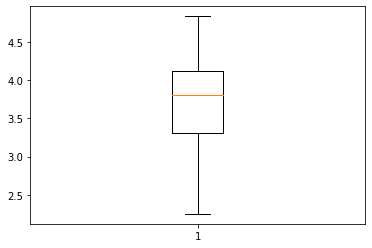

In [16]:
plt.boxplot(Data['depression_percent'])
plt.show()

In [17]:
Data['depression_minmax']=minmax_scale(Data['depression_percent'],copy=True)

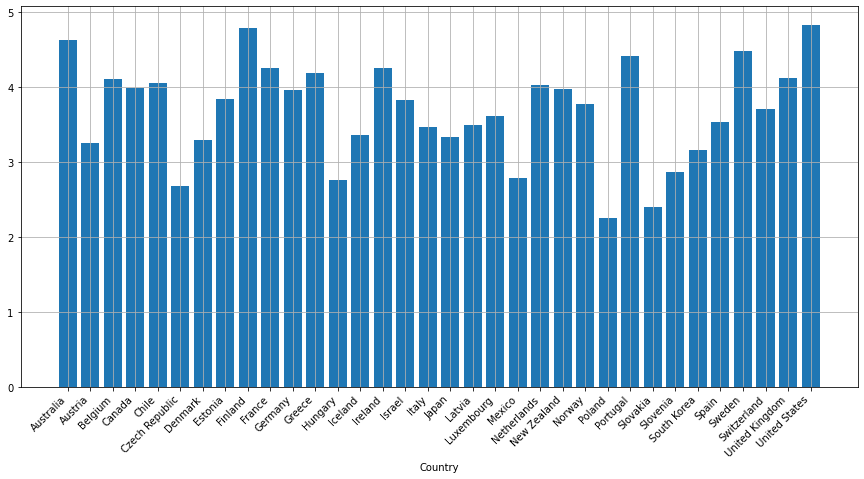

In [18]:
plt.figure(figsize=(15,7))
plt.bar(Data['Entity'],Data['depression_percent'])
plt.grid(True)
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
def Make_data(dataframe, data):
    dataframe=dataframe.sort_values(by=data)
    dataframe=dataframe.reset_index()
    return dataframe

def Make_plt(dataframe,data):
    #plt.plot(dataframe[data],dataframe['depression_percent'],'o',color='cornflowerblue',label=dataframe)
    sns.lmplot(x=data , y="depression_percent", height=10,data=dataframe)

def Make_linear(dataframe,data):
    linear=LinearRegression()
    linear.fit(dataframe[data].values.reshape(-1,1),dataframe['depression_percent'])
    pred=linear.predict(dataframe[data].values.reshape(-1,1))
    plt.plot(dataframe[data],linear.predict(dataframe[data].values.reshape(-1,1)),color='red')

    print('Score : ', linear.score(dataframe[data].values.reshape(-1,1),dataframe['depression_percent']))
    print('RMSE : ', mean_squared_error(pred, dataframe['depression_percent'])**0.5)
    print('MSE : ', mean_squared_error(pred, dataframe['depression_percent']),'\n')
    
    print("기울기 : ",linear.coef_)
    print("절편 : ",linear.intercept_,"\n\n")
    
def Pearson_corr(dataframe,data):
    body=pd.DataFrame({'depression_percent':dataframe['depression_percent'],data:dataframe[data]})

    pearson_corr=body.corr(method='pearson')
    print('pearson_corr : {}\n\n'.format(pearson_corr))

# Change rate PIR

Score :  0.02940249185892385
RMSE :  0.6417460287584864
MSE :  0.4118379654272881 

기울기 :  [-0.02881116]
절편 :  3.8626502794586632 




<Figure size 1008x1008 with 0 Axes>

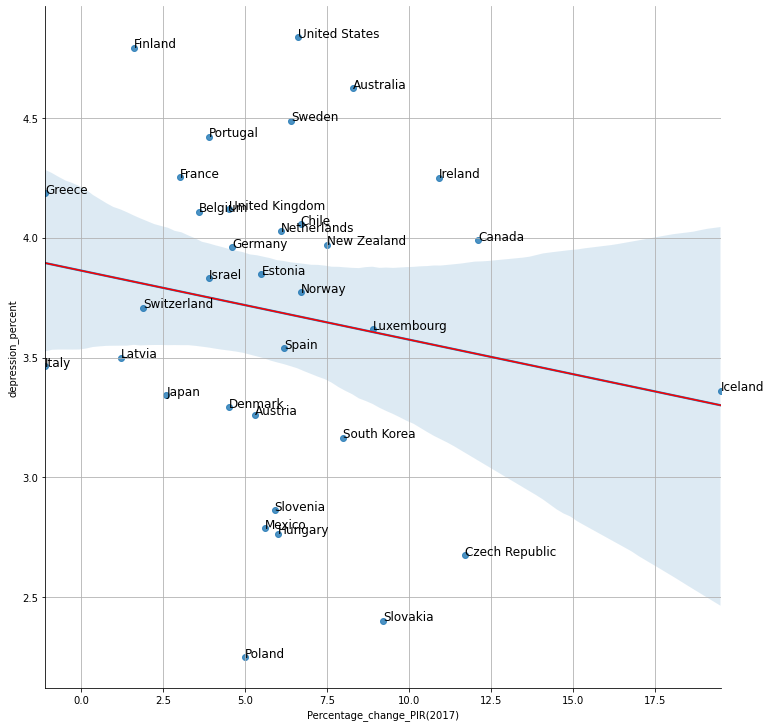

total_PIR_corr : SpearmanrResult(correlation=-0.12287941885382471, pvalue=0.48872733167229654)


In [47]:
plt.figure(figsize=(14,14))

data='Percentage_change_PIR'

PIR_data=Make_data(Data,data)
Make_plt(PIR_data,data)
for i, txt in enumerate(PIR_data['Entity']):
    plt.gca().annotate(txt, (PIR_data[data][i], PIR_data['depression_percent'][i]),size=12)

#Make_name(PIR_data,data)

Make_linear(PIR_data,data)

plt.xlabel('Percentage_change_PIR(2017)')
plt.ylabel('depression_percent')
plt.grid(True)
plt.show()

PIR_body=pd.DataFrame({'depression_percent':PIR_data['depression_percent'],'PIR':PIR_data[data]})
PIR_corr=stats.spearmanr(PIR_body.PIR,PIR_body.depression_percent)
print('total_PIR_corr : {}'.format(PIR_corr))

In [21]:
PIR_logis=sm.Logit(PIR_data['depression_minmax'],PIR_data['Percentage_change_PIR']).fit()
print(PIR_logis.summary())

Optimization terminated successfully.
         Current function value: 0.691020
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:      depression_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                -0.03481
Time:                        13:53:19   Log-Likelihood:                -23.495
converged:                       True   LL-Null:                       -22.704
Covariance Type:            nonrobust   LLR p-value:                       nan
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Percentage_change_PIR     0.0139      0.049      0.286      0.775      -0.081       0.

In [40]:
PIR_logis=sm.OLS(PIR_data['depression_minmax'],PIR_data['Percentage_change_PIR']).fit()
print(PIR_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:      depression_minmax   R-squared (uncentered):                   0.524
Model:                            OLS   Adj. R-squared (uncentered):              0.509
Method:                 Least Squares   F-statistic:                              36.27
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    9.04e-07
Time:                        14:25:31   Log-Likelihood:                         -18.942
No. Observations:                  34   AIC:                                      39.88
Df Residuals:                      33   BIC:                                      41.41
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

# house_price

Score :  0.10177400141621185
RMSE :  0.6173570535602837
MSE :  0.38112973158063496 

기울기 :  [-0.01768779]
절편 :  5.758298364012537 




<Figure size 1008x1008 with 0 Axes>

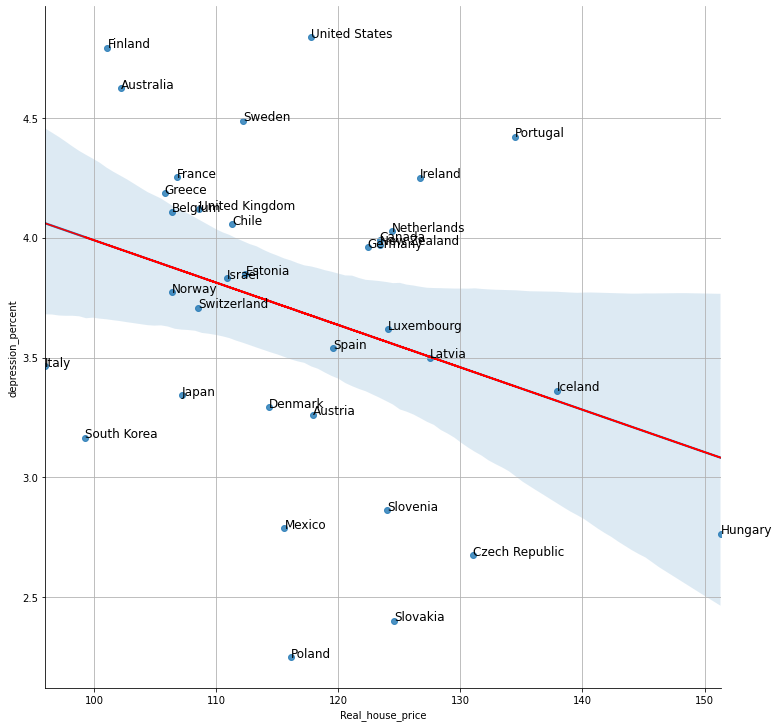

total_Real_house_price_corr : SpearmanrResult(correlation=-0.29584352423658034, pvalue=0.0893588040015231)


In [49]:
plt.figure(figsize=(14,14))

data='Real_house_price'

Real_house_price_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(Real_house_price_data,data)
Make_linear(PIR_data,data)
for i, txt in enumerate(Real_house_price_data['Entity']):
    plt.gca().annotate(txt, (Real_house_price_data[data][i], Real_house_price_data['depression_percent'][i]),size=12)


plt.xlabel('Real_house_price')
plt.ylabel('depression_percent')
plt.grid(True)
plt.show()

Real_house_price_body=pd.DataFrame({'depression_percent':Real_house_price_data['depression_percent'],'Real_house_price':Real_house_price_data[data]})
Real_house_price_corr=stats.spearmanr(Real_house_price_body.Real_house_price,Real_house_price_body.depression_percent)
print('total_Real_house_price_corr : {}'.format(Real_house_price_corr))

In [23]:
Real_house_price_logis=sm.Logit(Real_house_price_data['depression_minmax'],Real_house_price_data['Real_house_price']).fit()
print(Real_house_price_logis.summary())

Optimization terminated successfully.
         Current function value: 0.684686
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:      depression_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                -0.02533
Time:                        13:54:15   Log-Likelihood:                -23.279
converged:                       True   LL-Null:                       -22.704
Covariance Type:            nonrobust   LLR p-value:                       nan
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Real_house_price     0.0017      0.003      0.575      0.566      -0.004       0.007


In [39]:
Real_house_price_logis=sm.OLS(Real_house_price_data['depression_minmax'],Real_house_price_data['Real_house_price']).fit()
print(Real_house_price_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:      depression_minmax   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.792
Method:                 Least Squares   F-statistic:                              130.8
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    5.09e-13
Time:                        14:25:19   Log-Likelihood:                         -4.3154
No. Observations:                  34   AIC:                                      10.63
Df Residuals:                      33   BIC:                                      12.16
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

# Safety

Score :  0.03700515313343322
RMSE :  0.639227698830445
MSE :  0.408612050952066 

기울기 :  [0.01142355]
절편 :  2.8699966041929077 




<Figure size 1008x1008 with 0 Axes>

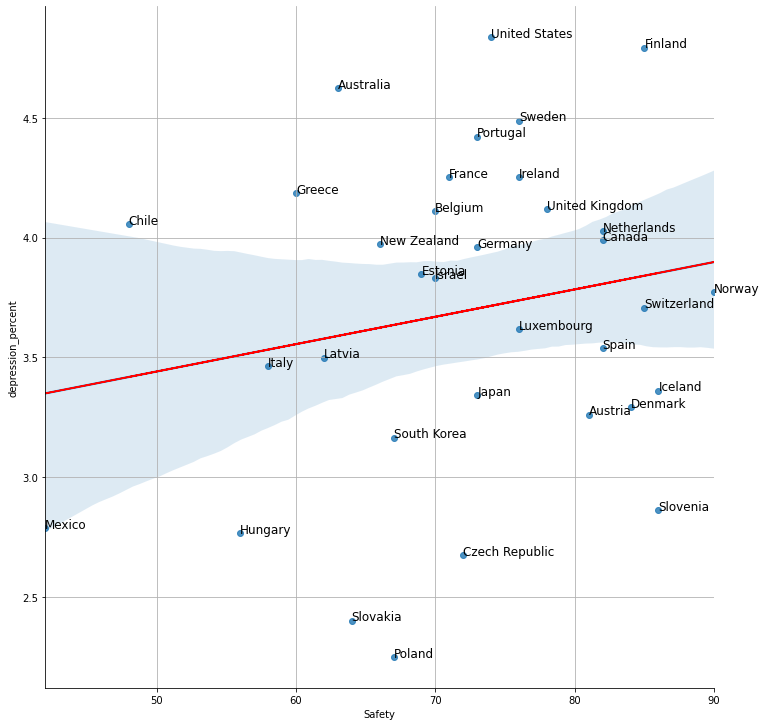

Safety_corr : SpearmanrResult(correlation=0.1251339471557921, pvalue=0.48072489794094597)


In [50]:
plt.figure(figsize=(14,14))

data='Safety'

Safety_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(Safety_data,data)
Make_linear(PIR_data,data)
for i, txt in enumerate(Safety_data['Entity']):
    plt.gca().annotate(txt, (Safety_data[data][i], Safety_data['depression_percent'][i]),size=12)


plt.xlabel('Safety')
plt.ylabel('depression_percent')
plt.grid(True)
plt.show()

Safety_body=pd.DataFrame({'depression_percent':Safety_data['depression_percent'],'Safety':Safety_data[data]})
Safety_corr=stats.spearmanr(Safety_body.Safety,Safety_body.depression_percent)
print('Safety_corr : {}'.format(Safety_corr))

In [25]:
Safety_logis=sm.Logit(Safety_data['depression_minmax'],Safety_data['Safety']).fit()
print(Safety_logis.summary())

Optimization terminated successfully.
         Current function value: 0.678628
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:      depression_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                -0.01626
Time:                        13:54:48   Log-Likelihood:                -23.073
converged:                       True   LL-Null:                       -22.704
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Safety         0.0036      0.005      0.748      0.455      -0.006       0.013


In [38]:
Safety_logis=sm.OLS(Safety_data['depression_minmax'],Safety_data['Safety']).fit()
print(Safety_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:      depression_minmax   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.828
Method:                 Least Squares   F-statistic:                              164.9
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    2.19e-14
Time:                        14:25:08   Log-Likelihood:                         -1.0953
No. Observations:                  34   AIC:                                      4.191
Df Residuals:                      33   BIC:                                      5.717
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Elder/Working

Score :  0.023125866327792455
RMSE :  0.6438176951366524
MSE :  0.4145012245710715 

기울기 :  [1.53053737]
절편 :  3.269798432563548 




<Figure size 1008x1008 with 0 Axes>

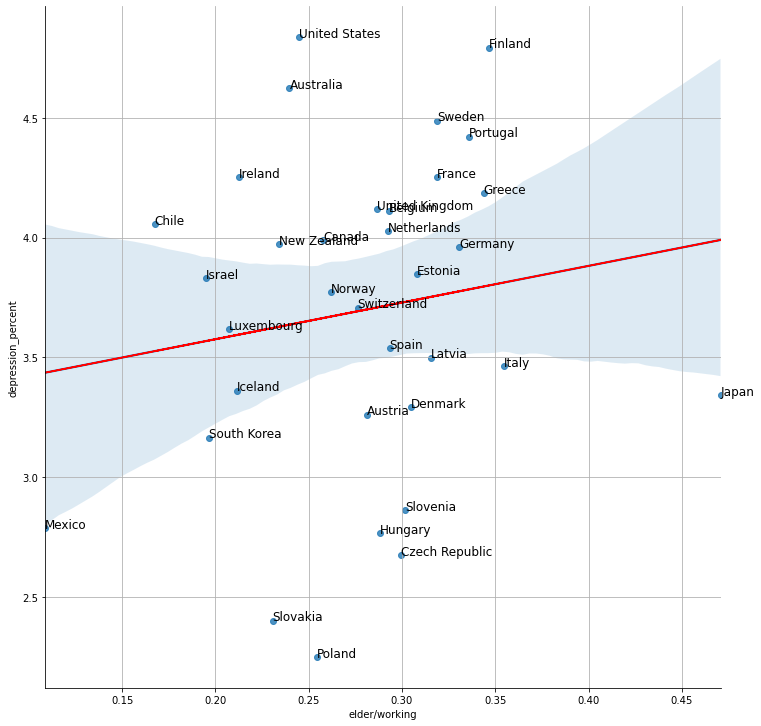

elder/working_corr : SpearmanrResult(correlation=0.18349885408708938, pvalue=0.29889543853741474)


In [51]:
plt.figure(figsize=(14,14))

Data['elder/working']=Data['Elderly_popul']/Data['Working_age_popul']

data='elder/working'

we_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(we_data,data)
for i, txt in enumerate(we_data['Entity']):
    plt.gca().annotate(txt, (we_data[data][i], we_data['depression_percent'][i]),size=12)

Make_linear(PIR_data,data)

plt.xlabel('elder/working')
plt.ylabel('depression_percent')
plt.grid(True)
plt.show()

we_body=pd.DataFrame({'depression_percent':we_data['depression_percent'],'we':we_data[data]})
we_corr=stats.spearmanr(we_body.we,we_body.depression_percent)
print('elder/working_corr : {}'.format(we_corr))

In [27]:
we_logis=sm.Logit(we_data['depression_minmax'],we_data['elder/working']).fit()
print(we_logis.summary())

Optimization terminated successfully.
         Current function value: 0.678367
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      depression_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                -0.01587
Time:                        13:55:17   Log-Likelihood:                -23.064
converged:                       True   LL-Null:                       -22.704
Covariance Type:            nonrobust   LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
elder/working     0.9223      1.223      0.754      0.451      -1.474       3.319


In [37]:
we_logis=sm.OLS(we_data['depression_minmax'],we_data['elder/working']).fit()
print(we_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:      depression_minmax   R-squared (uncentered):                   0.813
Model:                            OLS   Adj. R-squared (uncentered):              0.807
Method:                 Least Squares   F-statistic:                              143.2
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    1.50e-13
Time:                        14:24:56   Log-Likelihood:                         -3.0681
No. Observations:                  34   AIC:                                      8.136
Df Residuals:                      33   BIC:                                      9.663
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

# Working_hours

Score :  0.03721147280893711
RMSE :  0.6391592185490509
MSE :  0.40852450665623335 

기울기 :  [-0.00069446]
절편 :  4.847063451967814 




<Figure size 1008x1008 with 0 Axes>

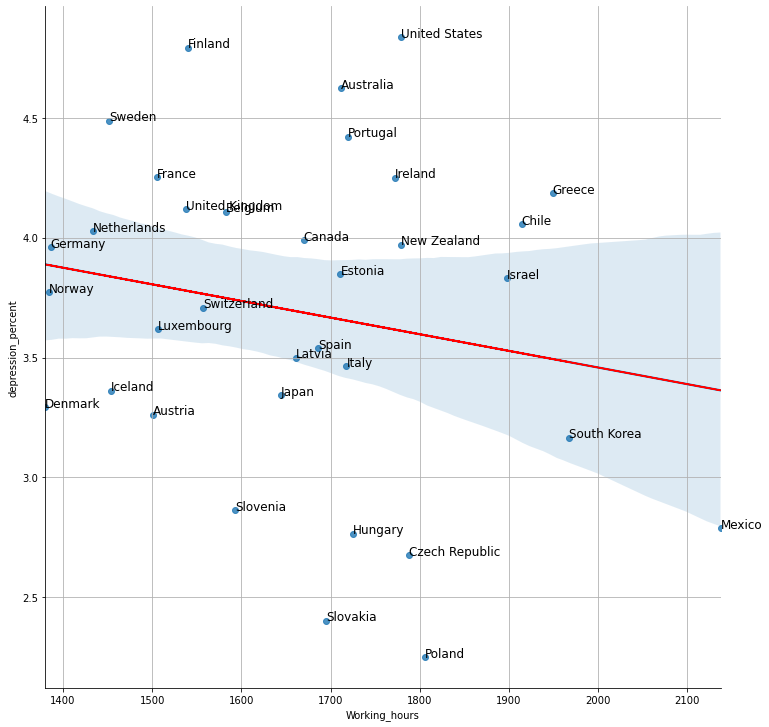

Working_hours_corr : SpearmanrResult(correlation=-0.1240736499915666, pvalue=0.48447992428424624)


In [52]:
plt.figure(figsize=(14,14))

data='Working_hours'

Working_hours_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(Working_hours_data,data)
Make_linear(PIR_data,data)
for i, txt in enumerate(Working_hours_data['Entity']):
    plt.gca().annotate(txt, (Working_hours_data[data][i], Working_hours_data['depression_percent'][i]),size=12)


plt.xlabel('Working_hours')
plt.ylabel('depression_percent')
plt.grid(True)
plt.show()

Working_hours_body=pd.DataFrame({'depression_percent':Working_hours_data['depression_percent'],'Working_hours':Working_hours_data[data]})
Working_hours_corr=stats.spearmanr(Working_hours_body.Working_hours,Working_hours_body.depression_percent)
print('Working_hours_corr : {}'.format(Working_hours_corr))

In [29]:
Working_hours_logis=sm.Logit(Working_hours_data['depression_minmax'],Working_hours_data['Working_hours']).fit()
print(Working_hours_logis.summary())

Optimization terminated successfully.
         Current function value: 0.683778
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:      depression_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                -0.02397
Time:                        13:55:44   Log-Likelihood:                -23.248
converged:                       True   LL-Null:                       -22.704
Covariance Type:            nonrobust   LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Working_hours     0.0001      0.000      0.606      0.544      -0.000       0.001


In [36]:
Working_hours_logis=sm.OLS(Working_hours_data['depression_minmax'],Working_hours_data['Working_hours']).fit()
print(Working_hours_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:      depression_minmax   R-squared (uncentered):                   0.805
Model:                            OLS   Adj. R-squared (uncentered):              0.799
Method:                 Least Squares   F-statistic:                              136.5
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    2.88e-13
Time:                        14:24:45   Log-Likelihood:                         -3.7342
No. Observations:                  34   AIC:                                      9.468
Df Residuals:                      33   BIC:                                      10.99
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

# Employ_rate

Score :  0.007776791479949141
RMSE :  0.6488559544404817
MSE :  0.4210140496128685 

기울기 :  [0.00948548]
절편 :  3.015408526166398 




<Figure size 1008x1008 with 0 Axes>

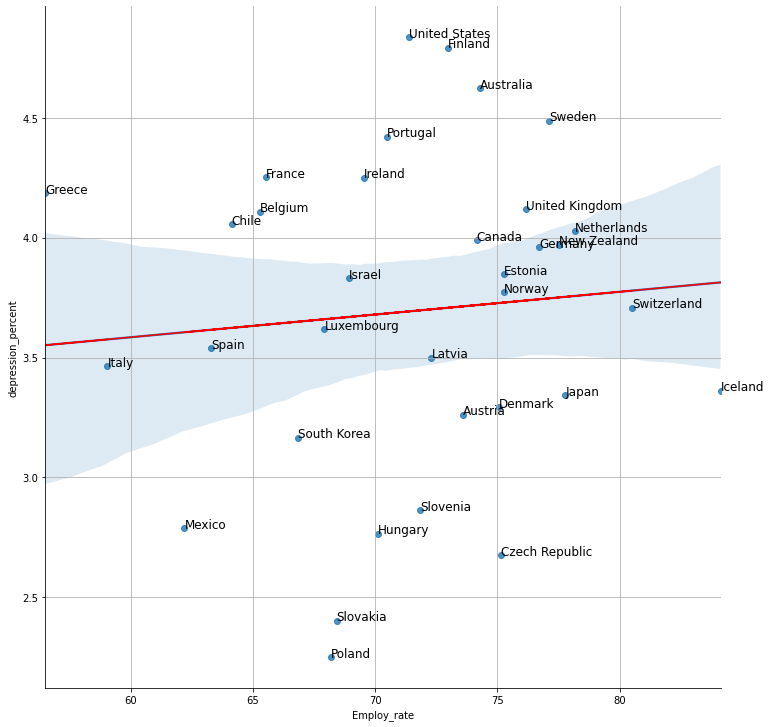

Employ_rate_corr : SpearmanrResult(correlation=0.0796088320758697, pvalue=0.654482422875289)


In [53]:
plt.figure(figsize=(14,14))

data='Employ_rate'

Employ_rate_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(Employ_rate_data,data)
Make_linear(PIR_data,data)
for i, txt in enumerate(Employ_rate_data['Entity']):
    plt.gca().annotate(txt, (Employ_rate_data[data][i], Employ_rate_data['depression_percent'][i]),size=12)

plt.xlabel('Employ_rate')
plt.ylabel('depression_percent')
plt.grid(True)
plt.show()

Employ_rate_body=pd.DataFrame({'depression_percent':Employ_rate_data['depression_percent'],'Employ_rate':Employ_rate_data[data]})
Employ_rate_corr=stats.spearmanr(Employ_rate_body.Employ_rate,Employ_rate_body.depression_percent)
print('Employ_rate_corr : {}'.format(Employ_rate_corr))

In [31]:
Employ_rate_logis=sm.Logit(Employ_rate_data['depression_minmax'],Employ_rate_data['Employ_rate']).fit()
print(Employ_rate_logis.summary())

Optimization terminated successfully.
         Current function value: 0.680851
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:      depression_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                -0.01958
Time:                        13:56:21   Log-Likelihood:                -23.149
converged:                       True   LL-Null:                       -22.704
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Employ_rate     0.0033      0.005      0.691      0.490      -0.006       0.013


In [35]:
Employ_rate_logis=sm.OLS(Employ_rate_data['depression_minmax'],Employ_rate_data['Employ_rate']).fit()
print(Employ_rate_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:      depression_minmax   R-squared (uncentered):                   0.830
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                              161.2
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    2.99e-14
Time:                        14:24:33   Log-Likelihood:                         -1.4131
No. Observations:                  34   AIC:                                      4.826
Df Residuals:                      33   BIC:                                      6.353
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

# Gini_coff

Score :  0.03499141542710449
RMSE :  0.6398957006817749
MSE :  0.40946650775101967 

기울기 :  [2.33936063]
절편 :  2.964546066024969 




<Figure size 1008x1008 with 0 Axes>

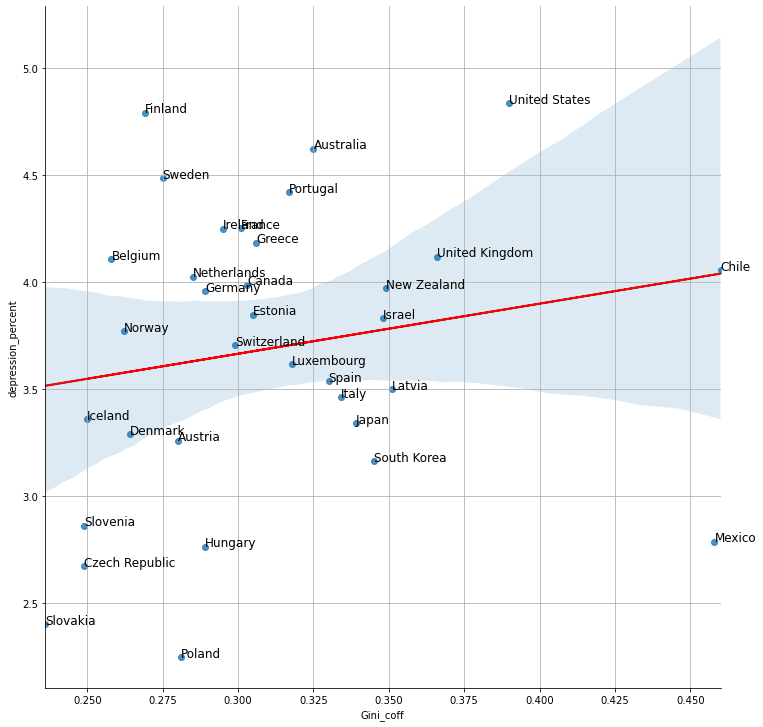

Gini_coff_corr : SpearmanrResult(correlation=0.24602689773806524, pvalue=0.16074270262047272)


In [54]:
plt.figure(figsize=(14,14))

data='Gini_coff'

Gini_coff_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(Gini_coff_data,data)
Make_linear(PIR_data,data)
for i, txt in enumerate(Gini_coff_data['Entity']):
    plt.gca().annotate(txt, (Gini_coff_data[data][i], Gini_coff_data['depression_percent'][i]),size=12)

plt.xlabel('Gini_coff')
plt.ylabel('depression_percent')
plt.grid(True)
plt.show()

Gini_coff_body=pd.DataFrame({'depression_percent':Gini_coff_data['depression_percent'],'Gini_coff':Gini_coff_data[data]})
Gini_coff_corr=stats.spearmanr(Gini_coff_body.Gini_coff,Gini_coff_body.depression_percent)
print('Gini_coff_corr : {}'.format(Gini_coff_corr))

In [33]:
Gini_coff_logis=sm.Logit(Gini_coff_data['depression_minmax'],Gini_coff_data['Gini_coff']).fit()
print(Gini_coff_logis.summary())

Optimization terminated successfully.
         Current function value: 0.678510
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      depression_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                -0.01608
Time:                        13:56:47   Log-Likelihood:                -23.069
converged:                       True   LL-Null:                       -22.704
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gini_coff      0.8255      1.098      0.752      0.452      -1.327       2.978


In [34]:
Gini_coff_logis=sm.OLS(Gini_coff_data['depression_minmax'],Gini_coff_data['Gini_coff']).fit()
print(Gini_coff_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:      depression_minmax   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.826
Method:                 Least Squares   F-statistic:                              162.1
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    2.78e-14
Time:                        14:24:19   Log-Likelihood:                         -1.3400
No. Observations:                  34   AIC:                                      4.680
Df Residuals:                      33   BIC:                                      6.206
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [42]:
index_list=['PIR','House_price','Safety','elder/working','Working_housrs','Employ_rate','Gini_coff']
total_corr=['-0.12287941885382471','-0.29584352423658034','0.1251339471557921','0.18349885408708938','-0.1240736499915666','0.0796088320758697','0.24602689773806524']
total_pvalue=['0.48872733167229654','0.0893588040015231','0.48072489794094597','0.29889543853741474','0.48447992428424624','0.654482422875289','0.16074270262047272']

bar_dict={'list':index_list,'total_corr':total_corr,'total_p':total_pvalue}

In [43]:
bar=pd.DataFrame(bar_dict)
bar

,list,total_corr,total_p
0,PIR,-0.12287941885382471,0.48872733167229654
1,House_price,-0.29584352423658034,0.0893588040015231
2,Safety,0.1251339471557921,0.48072489794094597
3,elder/working,0.18349885408708938,0.29889543853741474
4,Working_housrs,-0.1240736499915666,0.48447992428424624
5,Employ_rate,0.0796088320758697,0.654482422875289
6,Gini_coff,0.24602689773806524,0.16074270262047272


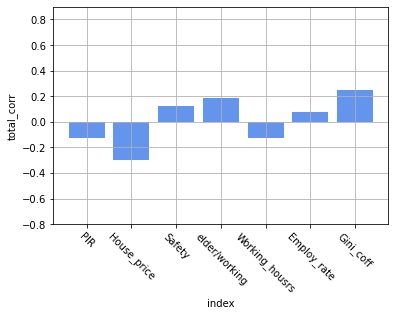

In [44]:
for i in range(len(bar)):
    plt.bar(bar['list'][i],float(bar['total_corr'][i]),color='cornflowerblue')
plt.grid(True)
plt.xlabel('index')
plt.ylabel('total_corr')
plt.ylim([-0.8,0.9])
plt.xticks(rotation = - 45)
plt.show()

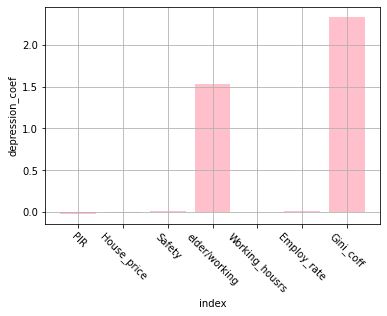

In [55]:
depression_coef=['-0.02881116','-0.01768779','0.01142355','1.53053737','-0.00069446','0.00948548','2.33936063']
depression_dict={'list':index_list, 'depression_coef':depression_coef}
depression=pd.DataFrame(depression_dict)

for i in range(len(depression)):
    plt.bar(depression['list'][i],float(depression['depression_coef'][i]),color='pink')
plt.grid(True)
plt.xlabel('index')
plt.ylabel('depression_coef')
#plt.ylim([0,3])
plt.xticks(rotation = - 45)
plt.show()